<a href="https://colab.research.google.com/github/GDIAMEL/dsc-phase-1-project/blob/master/SAMUEL_EMMANUEL_KIMARO_PROJECT_ONE_INDEX_IPYNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STUDENT NAME:** SAMUEL EMMANUEL KIMARO

**STUDENT PACE:** PART-TIME

**SCHEDULED PROJECT REVIEW DATE:** JULY 26TH 2024

**INSTRUCTOR NAME:** MD. VERONICA ISIAHO, MR. SAMUEL JANE

**BLOG POST URL:**

## **MICROSOFT MOVIE INDUSTRY ANALYSIS**

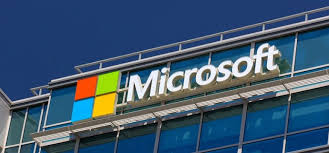



In the current world, film industry is so dynamic and it capivates audiences worldwide. Understanding the performance of movies across various categories provides valuable insights into:


*   Trends
*   Audience preference
*   Factors contributing to a films success









  With the required information by Microsoft, they will be able to achieve success in the industry as they will be able to farmiliarize themselves with factors that influence movie's market space performance.

The analysis will further examine the dataset's composition, specifically numerical and categorical variables, using graphical methods.

### **BUSINESS PROBLEM**

Microsoft is interested to get into the movie industry but they don’t know anything about creating movies. In this project i will focuss on analyzing which types of films are currently doing the best at the box office and translate my findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.


**DATASET DESCRIPTION**

Movie Title: Unique for each entry.

Popularity: Ranges according to the type of movie

Vote Average: Ranges from from the type of movie

Vote Count: Ranges from the type of movie

Production Budget: Ranges from the type of movie

Worldwide Gross: Ranges from the type of movie

ROI: Ranges from the type of movie

Original_Language: Indicates the language of the movie.

Genres: Includes multiple genres or specific genres.

Release Month: Indicates the month in which the movie was released.

Importing libraries

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Loading the csv file

In [82]:
# loading the file
df = pd.read_csv('/content/df_final_alex_vj.csv')

### **Exploring the dataset**


Inorder to gauge the dimensionality of the dataframe in terms of ( rows and columns) I will employ the use of df.shape

In [83]:
# gauging the dimensionality of the data
df.shape

(1834, 11)

Here, lets use df.head() to check the first few rows of the dataframe

In [84]:
# lets first check the first row
df.head()

,movie,original_language,popularity,vote_average,vote_count,release_date,production_budget,worldwide_gross,genres,release_month,ROI
0,#horror,de,6.099,3.3,102,2015-11-20,1500000,0,multiple_genres,11,-1500000
1,10 cloverfield lane,en,17.892,6.9,4629,2016-03-11,5000000,108286422,multiple_genres,3,103286422
2,10 days in a madhouse,en,0.955,5.4,7,2015-11-11,12000000,14616,drama,11,-11985384
3,12 strong,en,13.183,5.6,1312,2018-01-19,35000000,71118378,multiple_genres,1,36118378
4,12 years a slave,en,16.493,7.9,6631,2013-10-18,20000000,181025343,multiple_genres,10,161025343


For a better understanding of the information given lets use, df.info()

In [85]:
# getting the basic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              1834 non-null   object 
 1   original_language  1834 non-null   object 
 2   popularity         1834 non-null   float64
 3   vote_average       1834 non-null   float64
 4   vote_count         1834 non-null   int64  
 5   release_date       1834 non-null   object 
 6   production_budget  1834 non-null   int64  
 7   worldwide_gross    1834 non-null   int64  
 8   genres             1834 non-null   object 
 9   release_month      1834 non-null   int64  
 10  ROI                1834 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 157.7+ KB


To provide key statistics of the variables in the dataset, I will use the describe() function to get a summary of the numerical columns

In [86]:
# having a summary statistics of the data
df.describe()

,popularity,vote_average,vote_count,production_budget,worldwide_gross,release_month,ROI
count,1834.000000,1834.000000,1834.000000,1.834000e+03,1.834000e+03,1834.000000,1.834000e+03
mean,10.931178,6.176172,1704.708833,3.834575e+07,1.190712e+08,6.884406,8.072547e+07
std,8.180437,1.096821,2689.767236,5.200167e+07,2.226756e+08,3.481343,1.836923e+08
min,0.600000,0.000000,1.000000,9.000000e+03,0.000000e+00,1.000000,-1.104502e+08
25%,6.110250,5.600000,85.250000,5.000000e+06,3.287706e+06,4.000000,-1.688551e+06
50%,9.592500,6.200000,653.500000,2.000000e+07,3.668101e+07,7.000000,1.364081e+07
75%,14.449750,6.900000,2092.250000,4.600000e+07,1.227451e+08,10.000000,7.689673e+07
max,80.773000,10.000000,22186.000000,4.250000e+08,2.776345e+09,12.000000,2.351345e+09


In [87]:
# the most watched movie
df.loc[df['vote_count'].idxmax()]

movie                      inception
original_language                 en
popularity                     27.92
vote_average                     8.3
vote_count                     22186
release_date              2010-07-16
production_budget          160000000
worldwide_gross            835524642
genres               multiple_genres
release_month                      7
ROI                        675524642
Name: 694, dtype: object

In [88]:
# the least watched movie
df.loc[df['vote_count'].idxmin()]

movie                anderson's cross
original_language                  en
popularity                        0.6
vote_average                      5.0
vote_count                          1
release_date               2010-12-31
production_budget              300000
worldwide_gross                     0
genres                multiple_genres
release_month                      12
ROI                           -300000
Name: 108, dtype: object

In [89]:
# movie popularity based on which have values of above 50(as a condition)
df[df['popularity'] > 50]

,movie,original_language,popularity,vote_average,vote_count,release_date,production_budget,worldwide_gross,genres,release_month,ROI
146,avengers: infinity war,en,80.773,8.3,13948,2018-04-27,300000000,2048134200,multiple_genres,4,1748134200
744,john wick,en,78.123,7.2,10081,2014-10-24,30000000,76235001,multiple_genres,10,46235001
1313,the avengers,en,50.289,7.6,19673,2012-05-04,225000000,1517935897,multiple_genres,5,1292935897
1455,the hobbit: the battle of the five armies,en,53.783,7.3,8392,2014-12-17,250000000,945577621,multiple_genres,12,695577621


In [90]:
# most popular genre
df.loc[df['popularity'].idxmax()]

movie                avengers: infinity war
original_language                        en
popularity                           80.773
vote_average                            8.3
vote_count                            13948
release_date                     2018-04-27
production_budget                 300000000
worldwide_gross                  2048134200
genres                      multiple_genres
release_month                             4
ROI                              1748134200
Name: 146, dtype: object

In [91]:
# least popular genre
df.loc[df['popularity'].idxmin()]

movie                      1982
original_language            en
popularity                  0.6
vote_average                7.5
vote_count                    2
release_date         2016-03-01
production_budget       1000000
worldwide_gross               0
genres                    drama
release_month                 3
ROI                    -1000000
Name: 7, dtype: object

In [92]:
# highest ROI in a movie
df.loc[df['ROI'].idxmax()]

movie                    avatar
original_language            en
popularity               26.526
vote_average                7.4
vote_count                18676
release_date         2009-12-18
production_budget     425000000
worldwide_gross      2776345279
genres                   horror
release_month                12
ROI                  2351345279
Name: 144, dtype: object

In [93]:
# lowest ROI in a movie
df.loc[df['ROI'].idxmin()]

movie                mars needs moms
original_language                 en
popularity                     8.852
vote_average                     5.7
vote_count                       299
release_date              2011-03-11
production_budget          150000000
worldwide_gross             39549758
genres               multiple_genres
release_month                      3
ROI                       -110450242
Name: 873, dtype: object

In [94]:
# best performing production budget
df.loc[df['production_budget'].idxmax()]

movie                    avatar
original_language            en
popularity               26.526
vote_average                7.4
vote_count                18676
release_date         2009-12-18
production_budget     425000000
worldwide_gross      2776345279
genres                   horror
release_month                12
ROI                  2351345279
Name: 144, dtype: object

In [95]:
# the least release_date of a movie
df['release_date'].min()

'1915-02-08'

In [96]:
# the latest release_date of a movie
df['release_date'].max()

'2019-12-31'

**DATA CLEANING**

The reason as to why I am navigating data cleaning is because i want to ensure on the data accuracy and reliability. For this, i want to check on duplicated data or any data with missing value.

In [97]:
# this is meant for handling any missing values
df.isnull().sum()

movie                0
original_language    0
popularity           0
vote_average         0
vote_count           0
release_date         0
production_budget    0
worldwide_gross      0
genres               0
release_month        0
ROI                  0
dtype: int64

In [98]:
# incase of any duplicates this is how they will be removed
df.duplicated().sum()

0

It is now clear that the data has no duplicates and also there is no missing values.

## **DATA VISUALIZATION**

For Microsoft to get a visual representation of the data based on movie performance, i will visualize it based on the following:



*   Movie genres and their effect on ROI
*   The best language to use for increased movie popularity
*   Movie vote count based on various genres
*   Movie earnings based on world gross and production budget






**a) Movie genres and their effect on ROI**

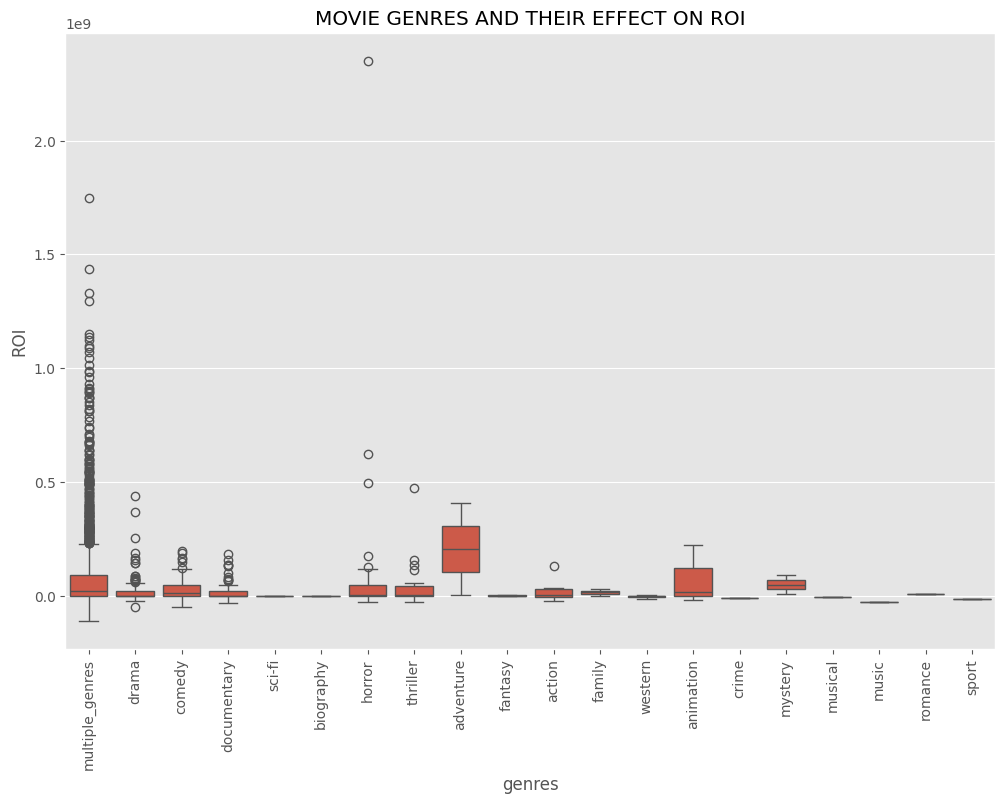

In [99]:
#Checking what microsoft would have as the Return On Investment based on movie genres
# choosing the plot style
plt.style.use('ggplot')
# creating the plot
plt.figure(figsize=(12,8))
sns.boxplot(x='genres', y='ROI', data=df)
# labeling and saving the plot
plt.title('MOVIE GENRES AND THEIR EFFECT ON ROI')
plt.xticks(rotation=90)
plt.savefig('genres_roi.png')
plt.show()

In the above boxplot, there are various genres that facilitate a comprehensive analysis of ROI variations across different film categories. We also see that the genres exhibit a wide range of ROI values, indicating significant variability in returns.

Several genres such as horror and multiple_genres, contain outlier data points with exceptionally high ROI values. These outliers suggest the presence of movies with significantly higher returns compared to others within the same genre.



The outlier data point squishes the visualization of the box. Sometimes, it is convenient to hide the outliers to get a better view of the boxplot and below is the representation.

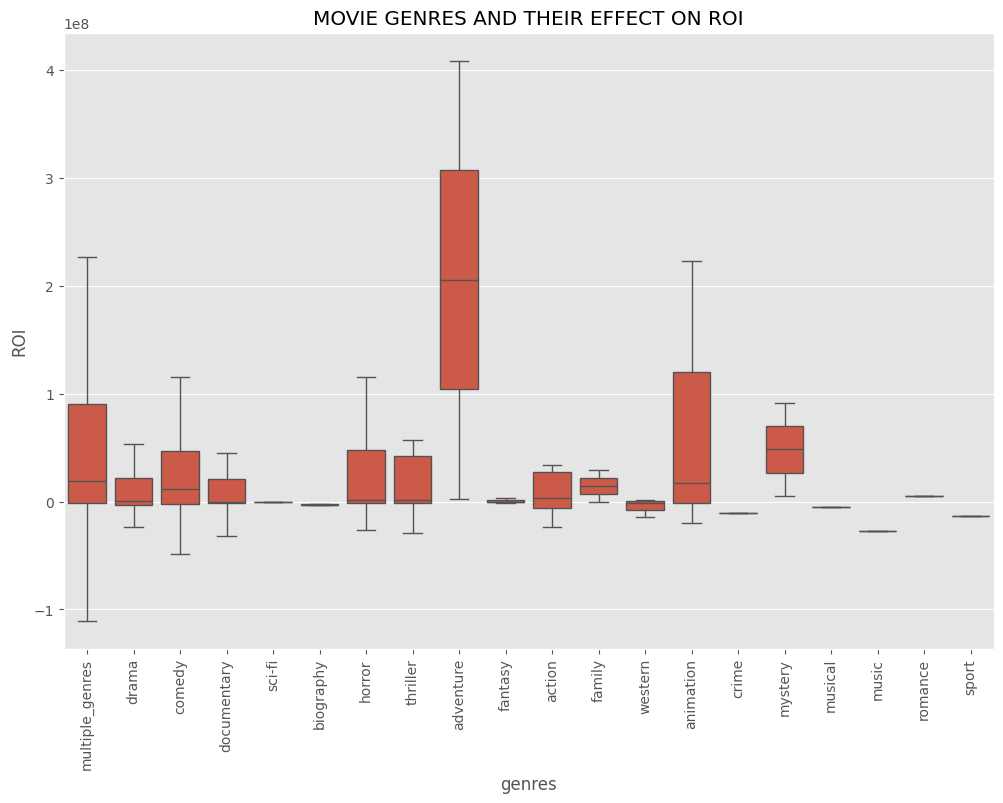

In [100]:
#Checking what microsoft would have as the Return On Investment based on movie genres
# choosing the plot style
plt.style.use('ggplot')
# creating the plot
plt.figure(figsize=(12,8))
sns.boxplot(x='genres', y='ROI', data=df, showfliers=False)
# labeling and saving the plot
plt.title('MOVIE GENRES AND THEIR EFFECT ON ROI')
plt.xticks(rotation=90)
plt.savefig('genres_roi.png')
plt.show()

With the above plot we can also calculate for the quartiles and percentiles range as follows:

In [101]:
# 25th percentile
df['ROI'].quantile(0.25)

-1688550.75

In [102]:
# 75th percentile
df['ROI'].quantile(0.75)

76896727.0

In [103]:
# median
df['ROI'].median()

13640811.5

**b) The best language to use for increased movie popularity**

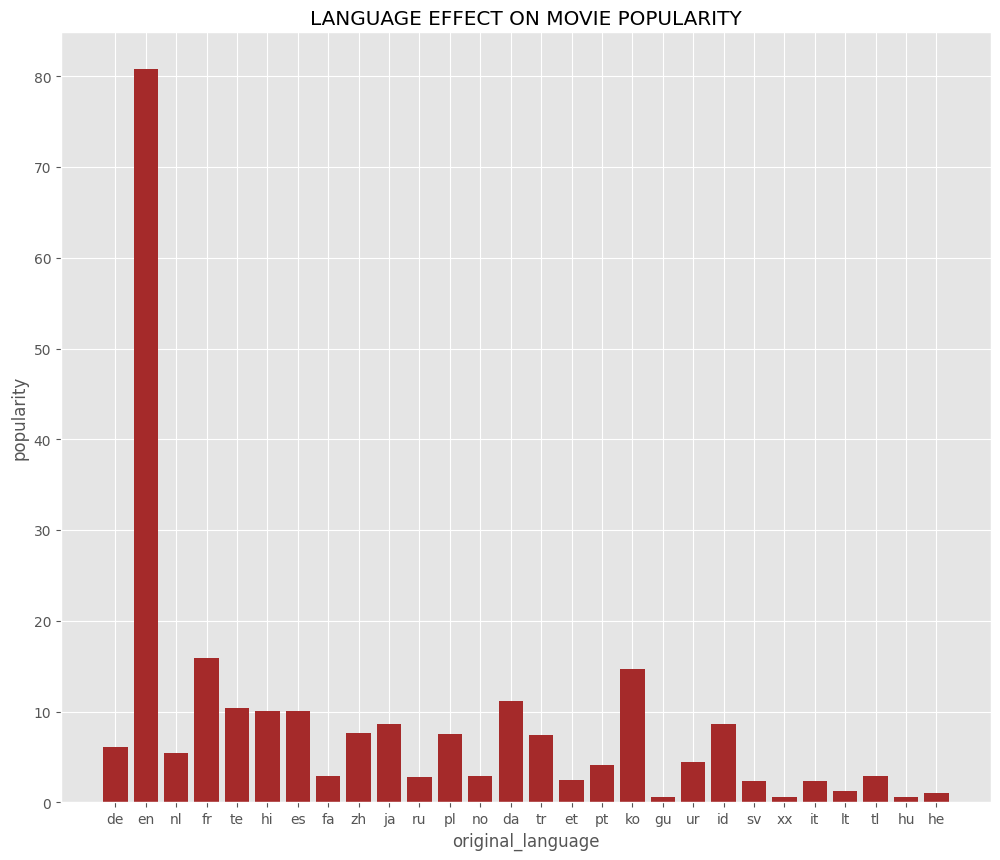

In [104]:
# assigning data to the x and y axis
x = df['original_language']
y= df['popularity']
# creating the plot
fig, ax = plt.subplots(figsize=(12,10))
plt.bar(x, y, color='brown')
# labeling
plt.title('LANGUAGE EFFECT ON MOVIE POPULARITY')
plt.xlabel('original_language')
plt.ylabel('popularity')
plt.show()

As we view the above data the original_language which has the highest popularity is denoted by 'en'. It is critical that Microsoft should also take note of this for increased Return On Investment.

**c) Movie vote count based on various genres**

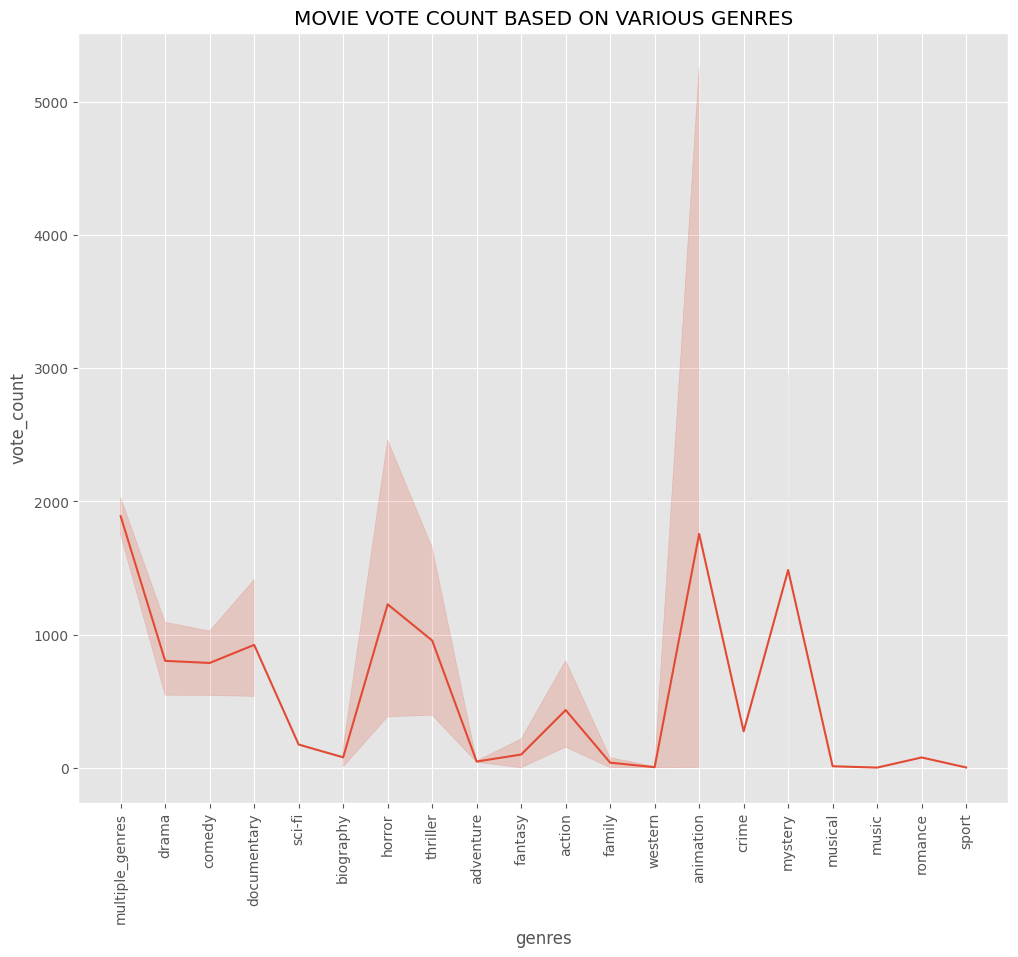

In [105]:
# plotting a line graph
#create a plot
fig, ax = plt.subplots(figsize=(12,10))
sns.lineplot(x='genres', y='vote_count', data=df)
# Labeling
plt.title('MOVIE VOTE COUNT BASED ON VARIOUS GENRES')
plt.xticks(rotation=90)
plt.show()

In the above it also clear that movies with multiple genres have the highest vote count


**d) Movie earnings based on world gross and production budget**

As we all know in terms of risk and rewards, higher budget symbolize higher financial risk. Even though a bigger budget may as well not mean that it will attract alot of audience, it can as well lead to substansial profit based on the movie quality and also on advertisement.

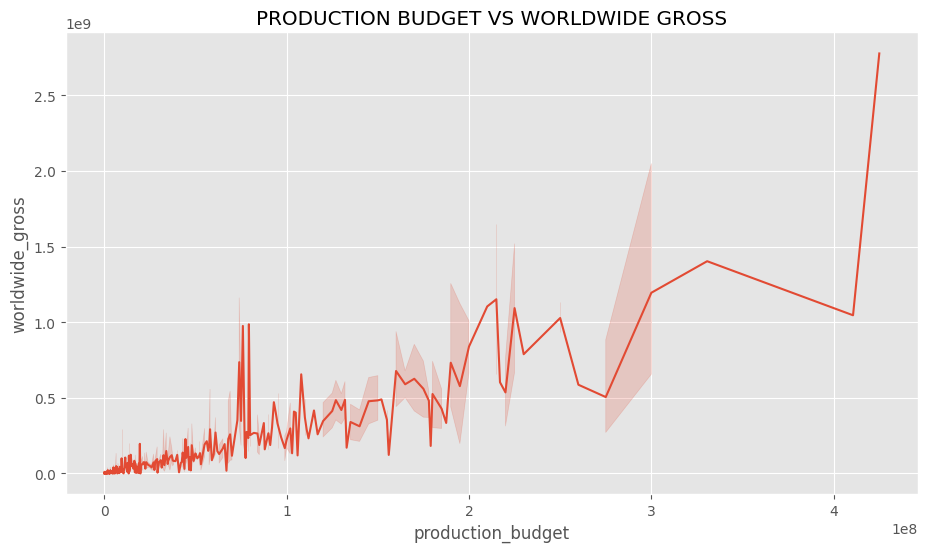

In [106]:
# we are looking on how production budget relates to world gross using a line graph
plt.figure(figsize=(11,6))
sns.lineplot(x='production_budget', y='worldwide_gross', data=df)
# Labeling
plt.title('PRODUCTION BUDGET VS WORLDWIDE GROSS')
plt.show()

I also want to work on an additional showing how the release month of a movie can infuence vote count.

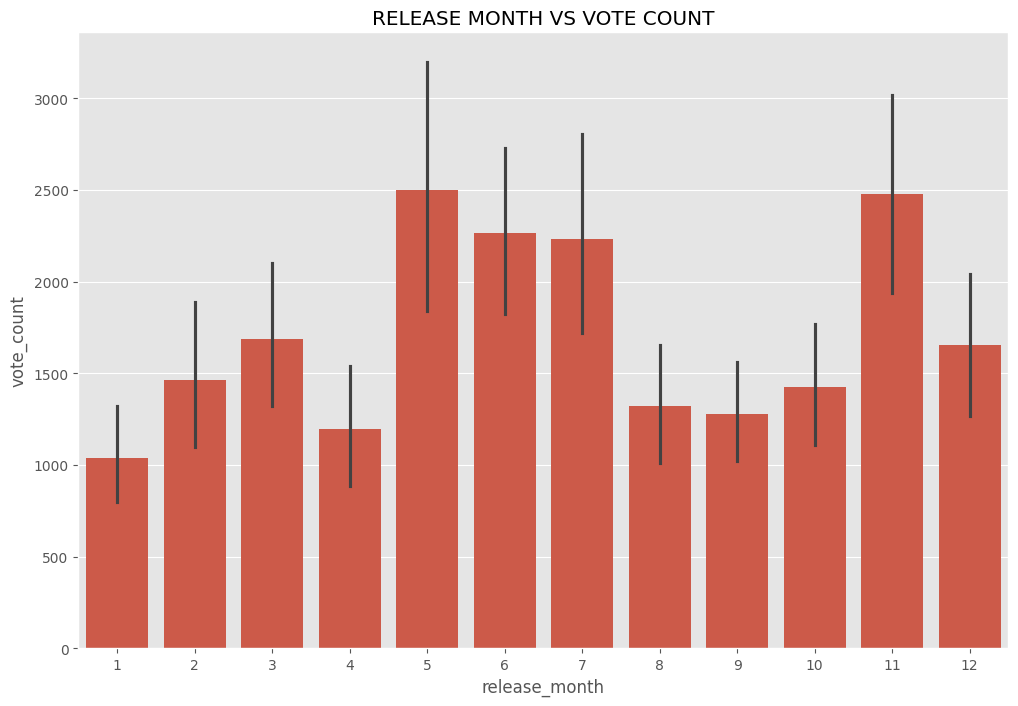

In [107]:
# identifying how release month of a movie can influence its vote count
plt.figure(figsize=(12,8))
sns.barplot(x='release_month', y='vote_count', data=df)
# Labeling
plt.title('RELEASE MONTH VS VOTE COUNT')
plt.show()

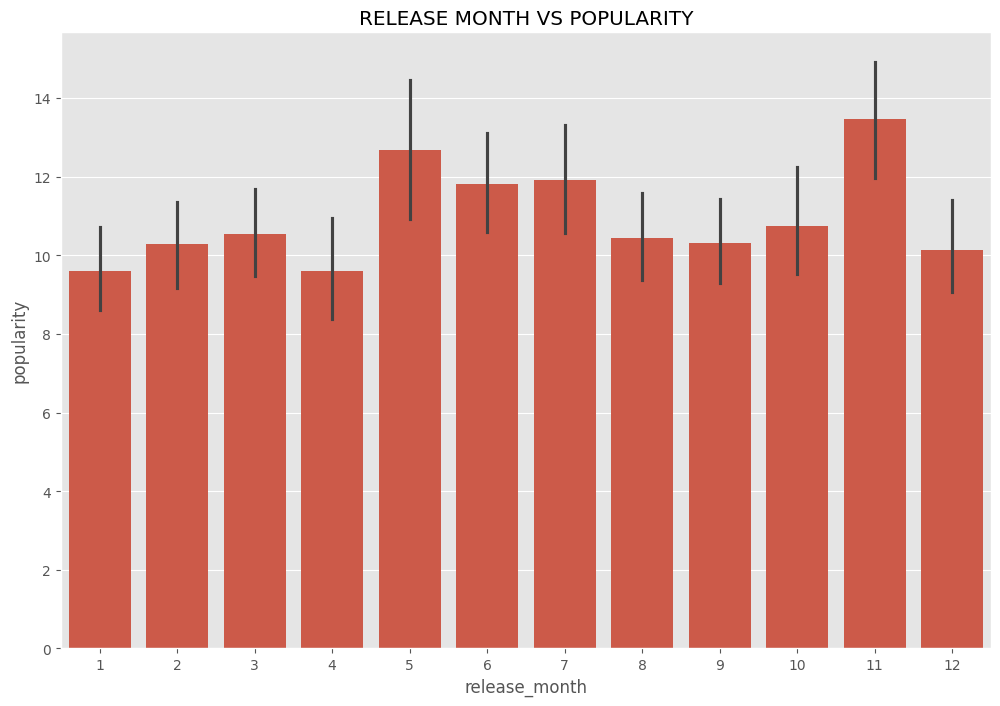

In [108]:
plt.figure(figsize=(12,8))
sns.barplot(x='release_month', y='popularity', data=df)
plt.title('RELEASE MONTH VS POPULARITY')
plt.show()

Microsoft should also know that it is best for the to focus on releasing their movies in both May and November so as to influence their vote count and the chances of their movies gaining popularity

## **NUMERICAL REPRESENTATION OF THE MOVIE DATA AND THEIR CORRELATION**

Correlation is a mutual relationship or connection between two or more things.

Previously, i talked of a numerical representation of this movie data as a whole and below is is a visiaul representation of the data ranging from popularity to ROI.

<Figure size 640x480 with 0 Axes>

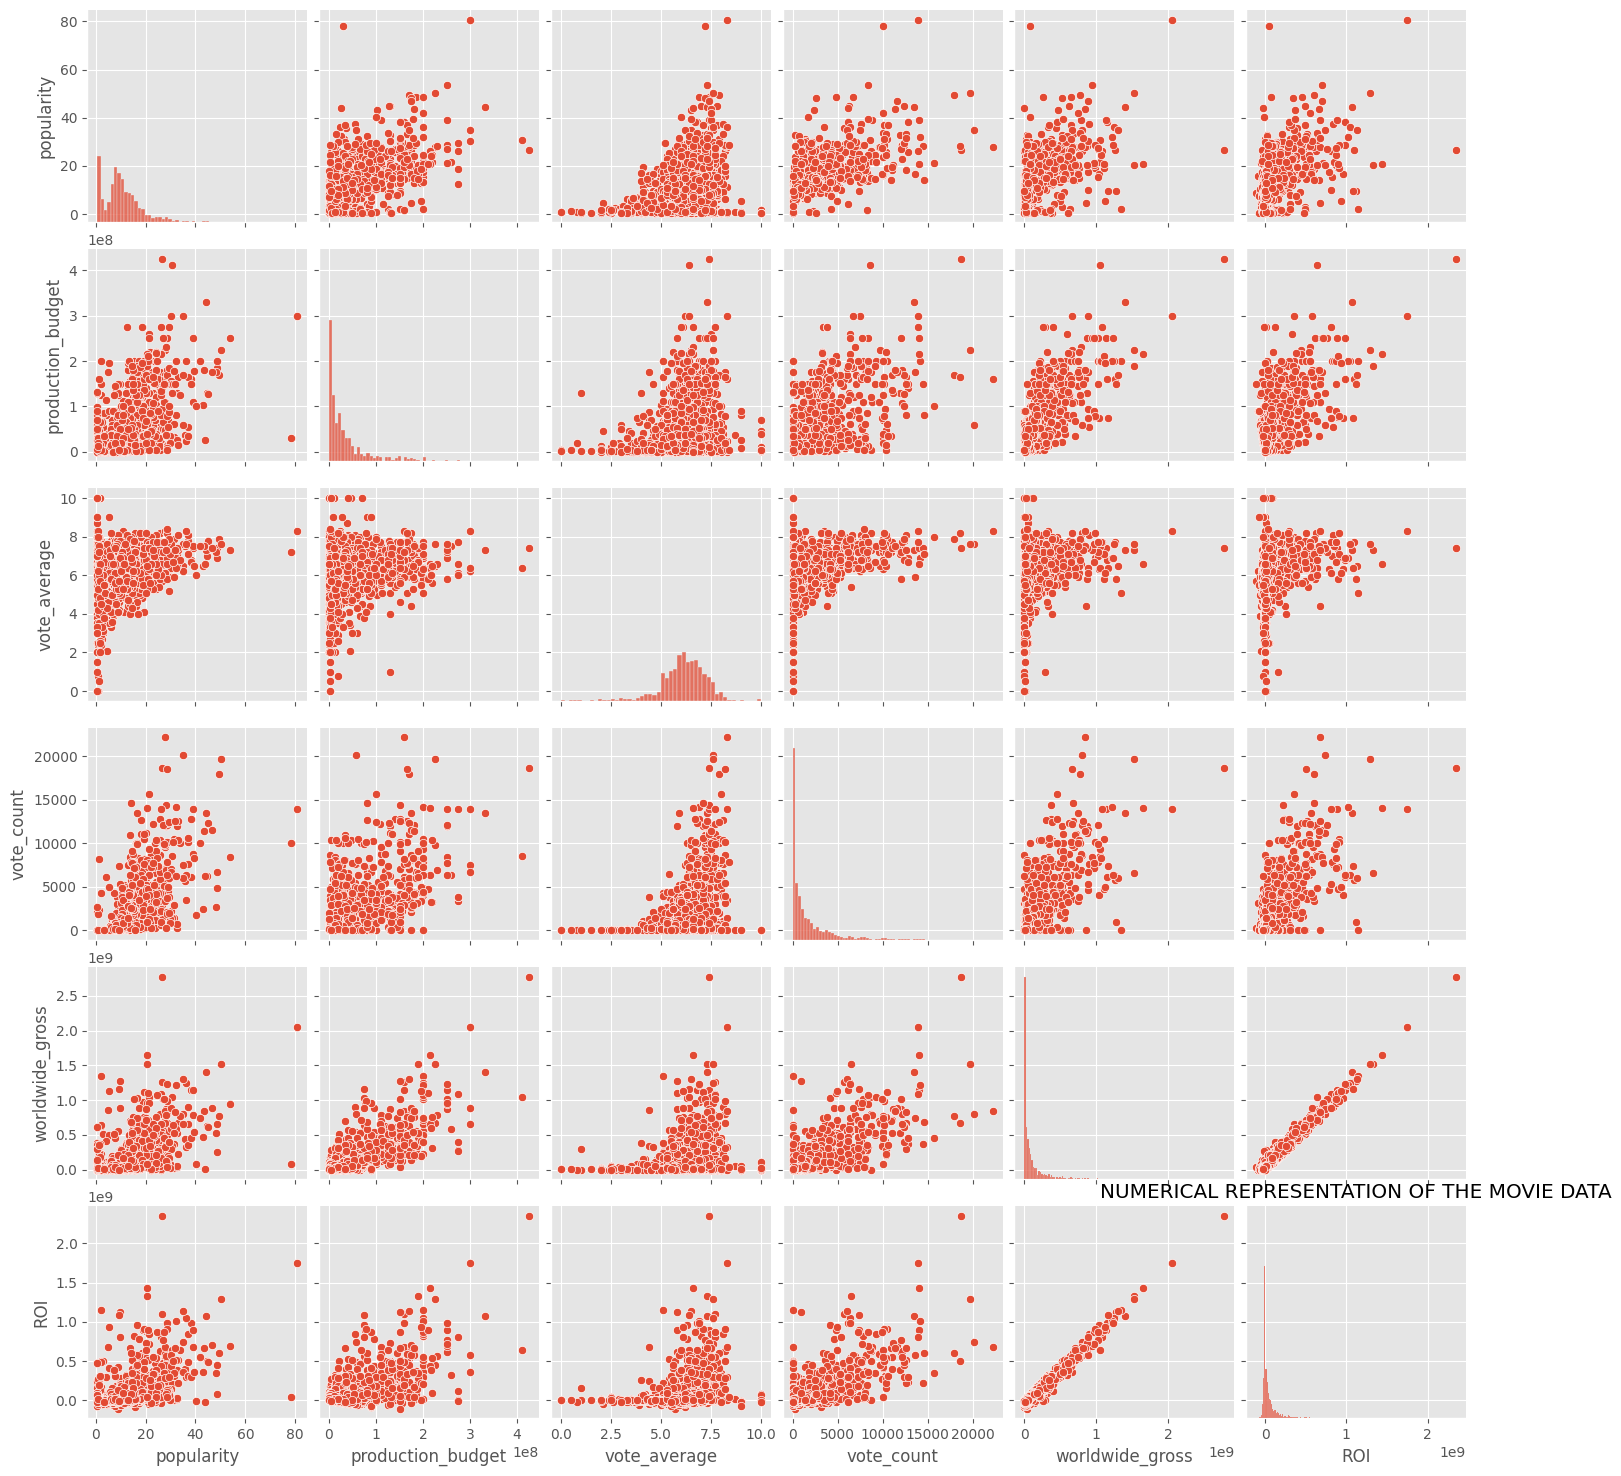

In [109]:
# a visual representation of all the numerical data in the movie data frame
plt.style.use('ggplot')
plt.figure()
sns.pairplot(df[['popularity','production_budget','vote_average','vote_count','worldwide_gross','ROI']])
plt.savefig('pairplot.png')
plt.title('NUMERICAL REPRESENTATION OF THE MOVIE DATA')
plt.show()

In the above plot, each red point represent data point. If the points are pread out, it indicates a weak correlation but for a more concentrated cluster, this would imply a strong correlation

**NB:** When i was working on this data i found some faults but below i will give more representation plus explanation

In [110]:
# Finding correlation in the movie data for microsoft
df.corr(numeric_only=True)

,popularity,vote_average,vote_count,production_budget,worldwide_gross,release_month,ROI
popularity,1.000000,0.327974,0.717182,0.590268,0.596561,0.039393,0.556064
vote_average,0.327974,1.000000,0.353992,0.152008,0.223752,0.073230,0.228204
vote_count,0.717182,0.353992,1.000000,0.639593,0.750794,0.039065,0.729064
production_budget,0.590268,0.152008,0.639593,1.000000,0.800799,0.009345,0.687654
worldwide_gross,0.596561,0.223752,0.750794,0.800799,1.000000,0.019919,0.985521
release_month,0.039393,0.073230,0.039065,0.009345,0.019919,1.000000,0.021500
ROI,0.556064,0.228204,0.729064,0.687654,0.985521,0.021500,1.000000


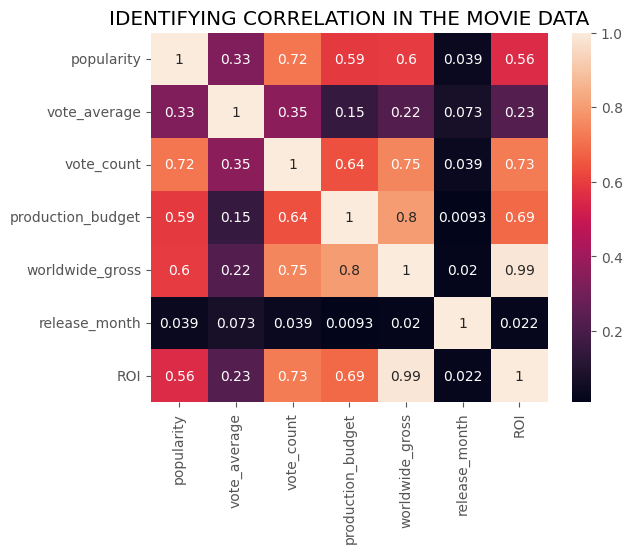

In [111]:
# for the above data here is a visual representation of it
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('IDENTIFYING CORRELATION IN THE MOVIE DATA')
plt.show()

I will discuss about the values stated in the above plot and their meaning.

0 = This represents no correlation betwee the values

1 = This means that there is a pefect positive correlation of the data

0.5 = This means that there is a low positive correlation

0.9 = This means that there is a high positive correlation

-0.5 = This represents a low negative correlation

-0.9 = This represents a high negative correlation

-1 = This represents a perfect negative correlation

**CONCLUSION**

**Recommendations**

The above visualizations have made it clear that Microsoft should focus on the following:



*   The language of use in a movie

The common the language the higher the audience reach and as a result increased return on investment(ROI). In the above analysis the common language is denoted by 'en' which i suppose its english. It will be best that microsoft should focus more on this as compared to (gu, xx and hu) for its success. For example, it is seen in movies such as: infinity war, John wick, the avengers and the battle of the five armies which are popular and they all have similiratities in the language that they use which is english. With this, we get to know that for the success of a movie, language is a critical factor to think of.

*   The type of movie genre

Microsoft should focus on the use of multiple genres in the movie industry as this is important in matters such as: audience diversification, cultural representation and also increased finance stability. In the above analysis its seen that multiple_genres have the highest vote_count. For example, some of the popular movies like: John wick, Infinity war and the Avengers fall under the multiple type of genre.


*   Production budget

Here, inorder for mictosoft to thrive well in the movie industry, they have to focus on things such as: market research, new technology and script quality. for example the higher the script quality the higher the chances of movie success regardles of the budget size which in turn will increase the total amount of money a movie generates from ticket sales worldwide(world gross). For example, even though Avengers is more popular compared to Avatar Microsoft should know that script quality should be prioritized more compared to production budget.

This is because Avatar has a higher production budget compared to Aventers but still when it comes to popularity, Avengers leads.

*   Vote count

This is a number of votes a certain film receives interms of award and nominations. In the above analysis its noted that multiple_genres movie have the highes count for example as it is seen by 'Inception'. Since its said in business that a customer is always right, Microsoft should focus on what the market needs and quench their thirst by focusing on movie production in line with the customers interest.





**ADDITIONAL POINT**

From the data and the graphs visuals it is also noted that the charts go up on May and November for both movie popularity and vote count against release month.

**ENDING STATEMENT**

Inorder for microsoft to lead in the industry in terms of success, they should focus on the above recommendations.